# TUTORIAL IMAGE PROCESSING FOR MATERIAL SCIENCE (II)

## Import the libraries 
activating the libraries to be used in the following

In [34]:
from PIL import Image      # Modulo basico de cargar imagenes
import numpy as np         # Modulo arrays
from pathlib import Path

# import matplotlib.pyplot as plt  # You need matplotlib to visualize if not napari

import pandas as pd
import numpy as np
import skimage
import skimage.measure
from os import listdir

# For future tuto
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# This is for napari in jupyter env.
%gui qt5 
import napari
from napari.utils import nbscreenshot

## 0.1 LOADING 2D IMAGES
It is more handy to convert the grayscale images to a binary one in Imagej/Fiji.

In [6]:
## Declaring the paths to the folders of work
folder_to_read = Path(r"D:\OneDrive - Universidad Politécnica de Madrid\2_Tareas\20201007_Iker_cluster") 
folder_to_save = Path(r"D:\OneDrive - Universidad Politécnica de Madrid\2_Tareas\20201007_Iker_cluster")

## Name of the files
name1 = 'Classification result-1.tif'
# name2 = 'Classification result-2.tif'
# name3 = 'Classification result-3.tif'
# name4 = 'Classification result-4.tif'

ruta_data1 = folder_to_read / name1
# ruta_data2 = folder_to_read / name2
# ruta_data3 = folder_to_read / name3
# ruta_data4 = folder_to_read / name4

## Assigning images to variables
# Check the different steps
'''
First we are using  objects:ruta_data1,ruta_data2.. of type Path (realised of the upcase 'P') to point to the path of the file in our computer. This would make it work for any Operative System (linux, windows, mac)
Second the Image class (again realised of the 'I') from the PIL library enables to read the image in the format we specify.
Third, and last the objects created by the class Image are turned into another object of other type> numpy array. These objects behave as what we would expect of a math matrix.
'''
img1 = np.array(Image.open(str(ruta_data1), mode='r'))
# img2 = np.array(Image.open(str(ruta_data2), mode='r'))
# img3 = np.array(Image.open(str(ruta_data3), mode='r'))
# img4 = np.array(Image.open(str(ruta_data4), mode='r'))

img1.shape
#carga direcciones al revés

(1755, 1883)

### Inspection of the images visually

In [23]:
viewer = napari.view_image(img1)

# More human analysis by machine learning

## CLUSTERING BY DBSCAN

## Data preparation

### Obtaining coordenates x,y

In [8]:
a_coords = np.argwhere(img1>0)
a_coords.shape, a_coords[:5]

((9486, 2),
 array([[  94, 1648],
        [  95, 1647],
        [  95, 1648],
        [ 105, 1076],
        [ 106, 1075]], dtype=int64))

### Create dataframe to export it

In [9]:
df_coords = pd.DataFrame(a_coords)
df_coords.to_csv('easy_clustering.csv',index=False)

In [10]:
x = a_coords[:,0]
y = a_coords[:,1]
# z = a_coords[:,2]
x[:5]

array([ 94,  95,  95, 105, 106], dtype=int64)

### Computing distances with kneighbours

In [11]:
neigh = NearestNeighbors(n_neighbors=50)
nbrs = neigh.fit(a_coords)
distances, indices = nbrs.kneighbors(a_coords)

In [12]:
a_coords

array([[  94, 1648],
       [  95, 1647],
       [  95, 1648],
       ...,
       [1754, 1808],
       [1754, 1809],
       [1754, 1822]], dtype=int64)

In [13]:
neigh = NearestNeighbors(n_neighbors=150)
nbrs = neigh.fit(a_coords)
distances, indices = nbrs.kneighbors(a_coords)

In [14]:
distances[:20], distances.shape

(array([[  0.        ,   1.        ,   1.41421356, ..., 336.6184784 ,
         337.21506491, 337.55740253],
        [  0.        ,   1.        ,   1.41421356, ..., 335.33565274,
         335.93451743, 336.27518493],
        [  0.        ,   1.        ,   1.        , ..., 335.67990705,
         336.27518493, 336.6184784 ],
        ...,
        [  0.        ,   1.        ,   1.        , ..., 345.1376537 ,
         348.54268031, 355.03943443],
        [  0.        ,   1.        ,   2.23606798, ..., 354.17086272,
         354.18921497, 354.30213096],
        [  0.        ,   1.        ,   1.41421356, ..., 354.18921497,
         354.30213096, 354.30213096]]),
 (9486, 150))

### Optimum values parameters

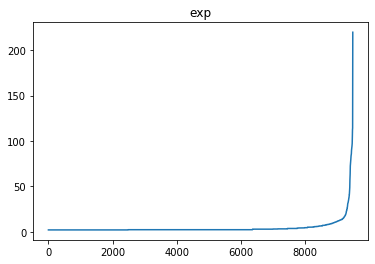

In [17]:
## Needs a bit yet
import matplotlib.pyplot as plt

distances = np.sort(distances, axis=0)

fig, ax = plt.subplots()
ax.plot(distances[:,10])
ax.set_title('exp')
# ax.set_ylim(0,20)
# ax.set_xlim(30000,70000)
plt.show()

In [18]:
m = DBSCAN(eps=30, min_samples=5)
m.fit(a_coords)
clusters = m.labels_
clusters.shape, np.max(clusters)

((9486,), 85)

In [19]:
a_puntos = [x.tolist(),y.tolist(),clusters.tolist()]
l_puntos = [item for item in zip(x,y,clusters)]
# l_puntos

In [22]:
img1_dummy = np.zeros((img1.shape))
img1_dummy
for row in l_puntos:
    img1_dummy[row[0],row[1]] = row[2]

In [26]:
viewer.add_image(img1_dummy)
viewer.add_labels(img1_dummy)

<Labels layer 'img1_dummy [1]' at 0x1e29520e508>

In [28]:
img1_dummy = img1_dummy.astype(np.int)

In [29]:
props_table = skimage.measure.regionprops_table(img1_dummy, properties=('label',
                                                                     'centroid',
                                                                     'area',
                                                                     'bbox_area',
                                                                     'equivalent_diameter',
                                                                     'major_axis_length',
                                                                     'minor_axis_length'))
props_table

df_props = pd.DataFrame(props_table)
df_props

,label,centroid-0,centroid-1,area,bbox_area,equivalent_diameter,major_axis_length,minor_axis_length
0,1,118,1734,21,1120,5.170883,45.236372,5.907981
1,2,141,720,14,1053,4.222008,52.890682,13.197257
2,3,141,498,113,1410,11.994835,61.623319,16.032263
3,4,143,1273,42,1110,7.312733,43.537135,21.663912
4,5,136,1381,54,800,8.291860,42.836533,16.450113
...,...,...,...,...,...,...,...,...
80,81,1729,1721,37,1088,6.863663,49.276865,9.302534
81,82,1735,50,68,1512,9.304853,52.650607,13.572060
82,83,1736,1378,5,330,2.523133,36.169141,6.192998
83,84,1744,1040,34,525,6.579525,41.444732,12.214149


In [67]:
df_props.to_csv(folder_to_save / 'clustering_grietas.csv',index=False)

In [32]:
viewer.add_points(df_props[['centroid-0','centroid-1']], size=15)

<Points layer 'Points' at 0x1e294ee3d88>

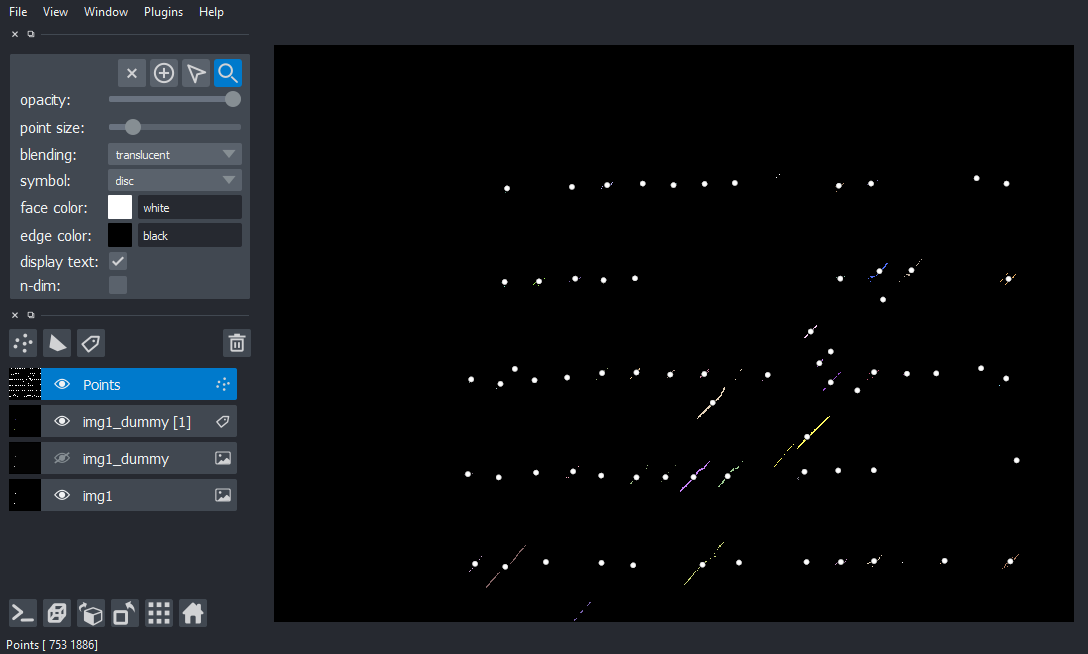

In [35]:
nbscreenshot(viewer)